In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from sympy import *

import scipy
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# matrix and vector
S = [ [ 1,  3, -2], 
      [ 0,  3,  4],
      [-5, -2,  4] ]

w = np.transpose([ [-2, 4, 3] ])

# compute the quadratic form
qf = w.T@S@w

print(qf)

[[130]]


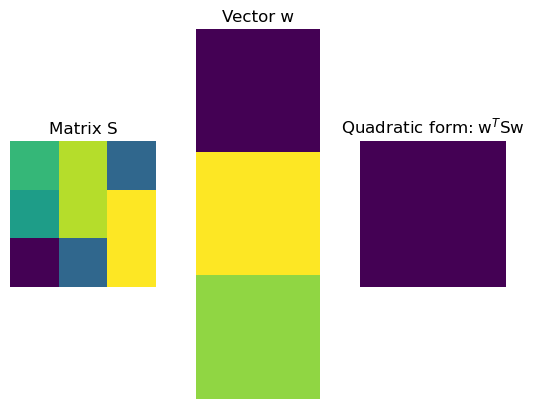

In [3]:
n = len(w) # used for plotting

# show the matrices
plt.subplot(131)
plt.imshow(S)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(132)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(133)
plt.imshow(qf)
plt.title('Quadratic form: w$^T$Sw')
plt.axis('off')

plt.show()

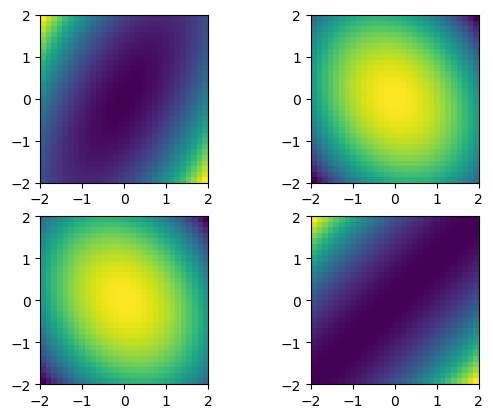

In [4]:
# some different matrices
# S = np.zeros((4,))
S = [[ [ 4, 4], [4, 9] ], [ [-4,-1], [3,-5] ],  [ [-4,-1], [3,-5] ],[ [ 1, 1], [1, 1] ] ]
# S[0] = [ [ 4, 4], [4, 9] ]
# S[1] = [ [-4,-1], [3,-5] ]
# S[2] = [ [-4,-1], [3,-5] ]
# S[3] = [ [ 1, 1], [1, 1] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )


for i in range(4):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map
    plt.subplot(2,2,i+1)
    plt.imshow(qf,extent=[wRange[0],wRange[-1],wRange[0],wRange[-1]])

plt.show()

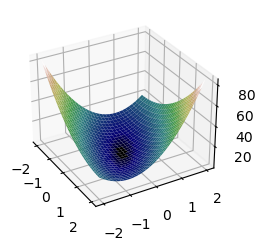

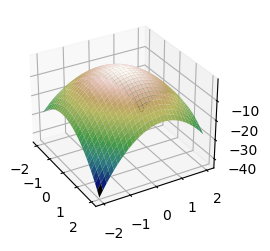

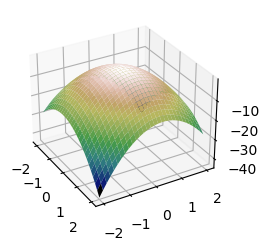

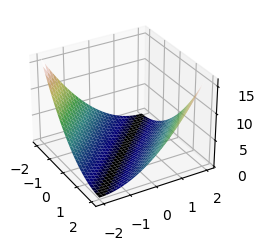

In [6]:
# 3D plotting code

mycmap = plt.get_cmap('gist_earth')
X,Y = np.meshgrid(wRange,wRange)

for i in range(4):
    
    for xi in range(n):
        for yi in range(n):
            w = np.array([ wRange[xi], wRange[yi] ])
            qf[xi,yi] = w.T@S[i]@w
    
    # show the map 
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221+i, projection='3d')
    surf1 = ax1.plot_surface(X, Y, qf.T, cmap=mycmap)
    ax1.view_init(azim=-30, elev=30)

plt.show()

Text(0.5, 0.92, 'Normalized quadratic form')

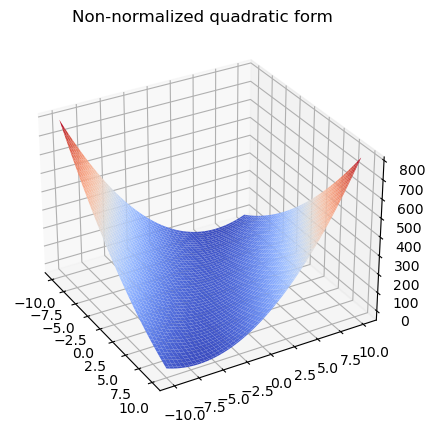

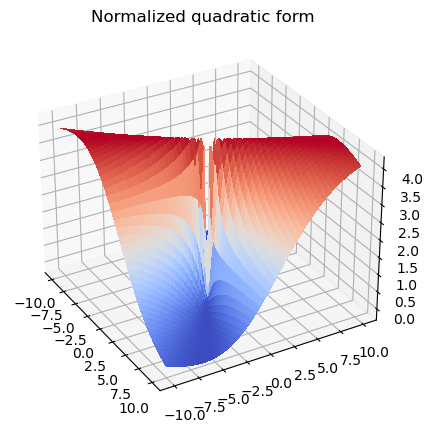

In [3]:
from matplotlib import cm
#  Visualize the normalised quadratic from
# A = np.array([[1,0], [0,1]])
A = np.array([[1,2],[2,3] ])

n = 100
xi = np.linspace(-10,10,n)

# for the visualization
X, Y = np.meshgrid(xi,xi)

# initialize
qf = np.zeros((n,n))
qfN = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        # create x (coordinate) vector
        x = np.transpose([xi[i], xi[j]])
        
        # compute the quadratic forms
        qf[i,j] = x.T@A@x
        qfN[i,j] = qf[i,j] / (x.T@x)
    

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection= "3d")
surf1 = ax1.plot_surface(X,Y,qf.T, cmap=cm.coolwarm)
ax1.view_init(azim=-30, elev=30)
ax1.set_title("Non-normalized quadratic form")

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection= "3d")
surf1 = ax1.plot_surface(X,Y,qfN.T, cmap=cm.coolwarm, antialiased = False)
ax1.view_init(azim=-30, elev=30)
ax1.set_title("Normalized quadratic form")


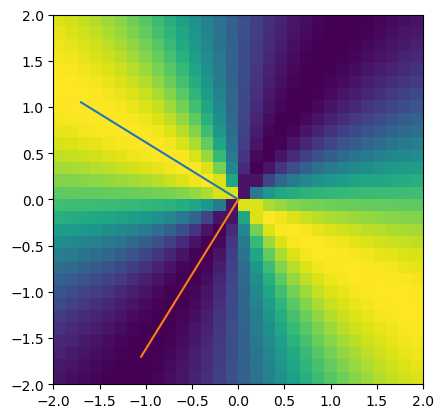

In [2]:
# a happy little symmetric matrix
A = [ [1,2],[2,3] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (n,n) )

# compute QF
for xi in range(n):
    for yi in range(n):
        # this w
        w = np.transpose([ wRange[xi], wRange[yi] ])

        # QF
        qf[xi,yi] = w.T@A@w / (w.T@w)


# compute eigendecomposition
D,V = np.linalg.eig(A)

# scale up eigenvectors
V = V*2

# show the surface
plt.imshow(qf,extent=[-2,2,-2,2])

# show the eigenvectors
plt.plot( [0,V[0,0]],[0,V[1,0]]  )
plt.plot( [0,V[0,1]],[0,V[1,1]]  )
plt.show()


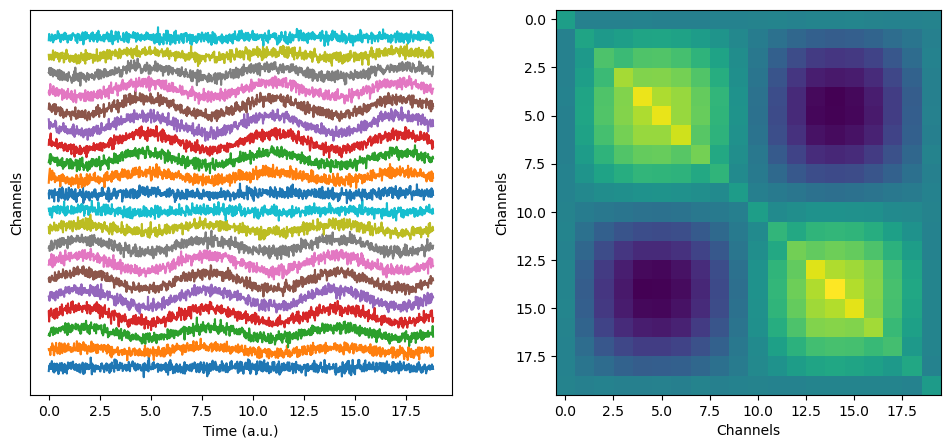

In [2]:
# simulation parameters
N = 1000 # time points
M =   20 # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# initialize data
data = np.zeros((M,N))

# create dataset
for i in range(M):
    data[i,:] = np.sin(t) * chanrel[i]

# add noise
data = data + np.random.randn(M,N)/3
    
# mean-center
for i in range(M):
    data[i,:] = data[i,:] - np.mean(data[i,:])


# compute covariance matrix
covmat = data@data.T/(N-1)


### show me the data!!
fig,ax = plt.subplots(1,2,figsize=(12,5))

# draw time series
for i in range(M):
    ax[0].plot(t,data[i,:]+i*2)
ax[0].set_yticks([])
ax[0].set_ylabel('Channels')
ax[0].set_xlabel('Time (a.u.)')

# show covariance matrix
ax[1].imshow(covmat)
ax[1].set_ylabel('Channels')
ax[1].set_xlabel('Channels')


plt.show()

/var/folders/lv/t_x0qxn13y374h66r__crswh0000gn/T/ipykernel_6546/1268275522.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


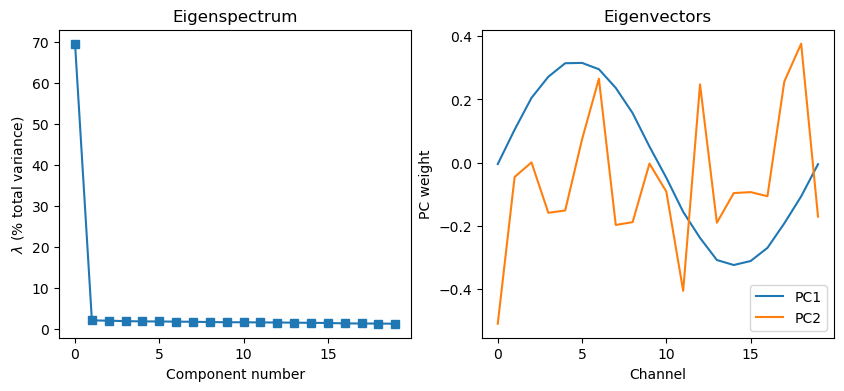

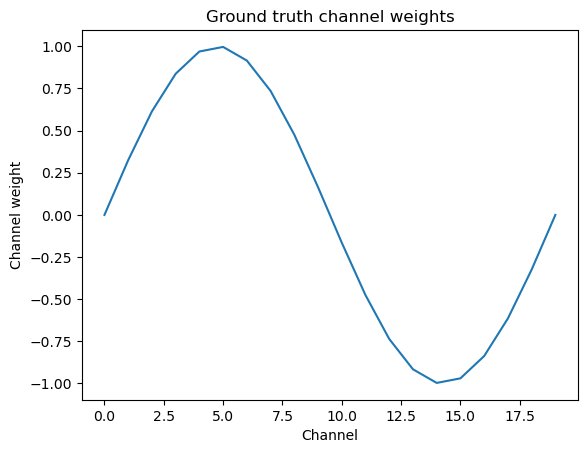

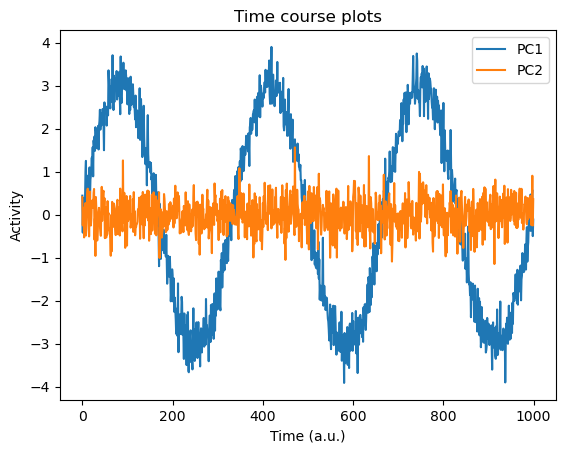

In [3]:
# eigendecomposition of the covariance matrix
evals,evecs = np.linalg.eig( covmat )

# sort eigenvalues and eigenvectors
idx   = np.argsort(evals)[::-1]   
evals = np.real( evals[idx] )
evecs = evecs[:,idx]

# convert eigenvalues to percent variance explained
evals = 100*evals/np.sum(evals)


# compute component time series
r = 2 # two components
comp_time_series = evecs[:,:r].T@data


# visualize and interpret the results

fig = plt.subplots(121,figsize=(10,4))
# eigenvalues
plt.subplot(121)
plt.plot(evals,'s-')
plt.xlabel('Component number')
plt.ylabel('$\lambda$ (% total variance)')
plt.title('Eigenspectrum')

# eigenvectors
plt.subplot(122)
plt.plot(evecs[:,0],label='PC1')
plt.plot(evecs[:,1],label='PC2')
plt.xlabel('Channel')
plt.ylabel('PC weight')
plt.title('Eigenvectors')
plt.legend()
plt.show()

# original channel modulator
plt.plot(chanrel)
plt.xlabel('Channel')
plt.ylabel('Channel weight')
plt.title('Ground truth channel weights')
plt.show()

# component time series
plt.plot(comp_time_series[0,:],label='PC1')
plt.plot(comp_time_series[1,:],label='PC2')
plt.xlabel('Time (a.u.)')
plt.ylabel('Activity')
plt.legend()
plt.title('Time course plots')
plt.show()
